# Question 3: Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?

To analyse the characteristics of houses, we need to import a new dataset that contains the information on the houses. As we already found out, The Bronx has the highest number of heating complaints out of all the boroughs so we will be focussing on the information for houses located in the Bronx. We will also import the heating dataset we created for question 2 to find relationships between the two datasets.

## Import libraries and datasets

In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import heating dataset
heating_df = pd.read_csv("heating_df.csv").drop("Unnamed: 0", axis=1)

# import housing information dataset
house_df = pd.read_csv("PLUTO_for_WEB/BX_18v1.csv", usecols=["Address", "BldgArea", "BldgDepth", "BuiltFAR", "CommFAR", 
                                                             "FacilFAR", "Lot", "LotArea", "LotDepth", "NumBldgs", 
                                                             "NumFloors", "OfficeArea", "ResArea", "ResidFAR", "RetailArea", 
                                                             "YearBuilt", "YearAlter1", "ZipCode", "YCoord","XCoord"])

print("Libraries and datasets imported")

Libraries and datasets imported


In [2]:
heating_df.head()

,Complaint Type,Incident Zip,Incident Address,Street Name,City,Status,Borough,Latitude,Longitude
0,HEATING,11210.0,3101 FOSTER AVENUE,FOSTER AVENUE,BROOKLYN,Closed,Unspecified,40.638696,-73.946969
1,HEATING,10466.0,1405 EAST 233 STREET,EAST 233 STREET,BRONX,Closed,Unspecified,40.888997,-73.836192
2,HEATING,11226.0,22 MARTENSE STREET,MARTENSE STREET,BROOKLYN,Closed,Unspecified,40.651236,-73.958293
3,HEATING,11212.0,1115 WILLMOHR STREET,WILLMOHR STREET,BROOKLYN,Closed,Unspecified,40.657228,-73.917447
4,HEATING,11210.0,3103 FOSTER AVENUE,FOSTER AVENUE,BROOKLYN,Closed,Unspecified,40.638696,-73.946947


In [3]:
house_df.head()

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


### Isolate heating complaints only to the Bronx borough

In [4]:
bronx_heating_df = heating_df[heating_df["Borough"]=="BRONX"]
bronx_heating_df = bronx_heating_df.dropna(subset=["Street Name", "Incident Zip"])
bronx_heating_df.drop(["Status", "Latitude", "Longitude", "City", "Borough"], axis=1, inplace=True)
bronx_heating_df.reset_index(drop=True, inplace=True)
bronx_heating_df.head()

,Complaint Type,Incident Zip,Incident Address,Street Name
0,HEATING,10468.0,2781 RESERVOIR AVENUE,RESERVOIR AVENUE
1,HEATING,10453.0,10 WEST 182 STREET,WEST 182 STREET
2,HEATING,10468.0,2420 DAVIDSON AVENUE,DAVIDSON AVENUE
3,HEATING,10460.0,1536 LELAND AVENUE,LELAND AVENUE
4,HEATING,10460.0,770 GARDEN STREET,GARDEN STREET


## Very light exploration and cleaning of the housing information dataframe

In [5]:
# What information are we given
house_df.columns

Index(['Lot', 'ZipCode', 'Address', 'LotArea', 'BldgArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'NumBldgs', 'NumFloors', 'LotDepth',
       'BldgDepth', 'YearBuilt', 'YearAlter1', 'BuiltFAR', 'ResidFAR',
       'CommFAR', 'FacilFAR', 'XCoord', 'YCoord'],
      dtype='object')

In [6]:
# How many entries and columns do we have
house_df.shape

(89854, 20)

In [7]:
# Make sure the data types are correct
house_df.dtypes

Lot             int64
ZipCode       float64
Address        object
LotArea         int64
BldgArea        int64
ResArea         int64
OfficeArea      int64
RetailArea      int64
NumBldgs        int64
NumFloors     float64
LotDepth      float64
BldgDepth     float64
YearBuilt       int64
YearAlter1      int64
BuiltFAR      float64
ResidFAR      float64
CommFAR       float64
FacilFAR      float64
XCoord        float64
YCoord        float64
dtype: object

In [8]:
house_df.dropna(subset=["ZipCode", "Address"], inplace=True)
house_df.head()

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


## Approach to the question

To answer question 3, I am going to take two approaches:
1. Use a binary approach where the features will either end in a complaint being made(represented by a 1) or not (represented by a 0)
2. Using total number of complaints for each street to analyse correlation

## First approach

Use the heating dataframe and add a column representing a complaint has been made.

In [9]:
binary_heating_df = bronx_heating_df
binary_heating_df["Complaint Made"] = np.ones(len(binary_heating_df), dtype=int)
binary_heating_df.drop("Complaint Type", axis=1, inplace=True)
binary_heating_df.head()

,Incident Zip,Incident Address,Street Name,Complaint Made
0,10468.0,2781 RESERVOIR AVENUE,RESERVOIR AVENUE,1
1,10453.0,10 WEST 182 STREET,WEST 182 STREET,1
2,10468.0,2420 DAVIDSON AVENUE,DAVIDSON AVENUE,1
3,10460.0,1536 LELAND AVENUE,LELAND AVENUE,1
4,10460.0,770 GARDEN STREET,GARDEN STREET,1


In [10]:
house_df.head()

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


### Merge the heating dataframe with the housing dataframe
Note that when there is no heating complaint, the value in "Complaint Made" will be equal to 0

In [11]:
merged_df = pd.merge(binary_heating_df, house_df, how="right", left_on=["Street Name", "Incident Zip"], right_on=["Address", "ZipCode"])
merged_df.drop(["Street Name", "Incident Zip", "Address", "ZipCode", "XCoord", "YCoord"], axis=1, inplace=True)
merged_df["Complaint Made"].fillna(0, inplace=True)
merged_df["Complaint Made"] = merged_df["Complaint Made"].astype(int)
merged_df["Complaint Made"].value_counts()
merged_df.head(10)

,Incident Address,Complaint Made,Lot,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,2781 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
1,2691 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
2,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
3,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
4,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
5,2781 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
6,2755 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
7,2755 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
8,2755 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
9,2755 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0


### Find the Pearson Correlation and P-Value of the housing characteristics with the target "Complaint Made"

In [12]:
from scipy import stats

corr_df = pd.DataFrame(columns=merged_df.columns[2:], index=["Pearson Corr", "P-Value"])
for column in corr_df.columns:
    pearson_coef, p_value = stats.pearsonr(merged_df["Complaint Made"], merged_df[column])
    corr_df[column]["Pearson Corr"] = pearson_coef
    corr_df[column]["P-Value"] = p_value

corr_df

,Lot,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
Pearson Corr,0.0135295,0.0113194,-0.079132,-0.0981778,0.00396574,-0.0695622,-0.253903,-0.731387,0.0277289,-0.602128,-0.755379,-0.218871,-0.421666,0.0663305,0.0513572,0.0679223
P-Value,3.18555e-49,5.62946e-35,0,0,1.54197e-05,0,0,0,9.60683e-201,0,0,0,0,0,0,0


### Visualise the Pearson Correlations with a correlation matrix

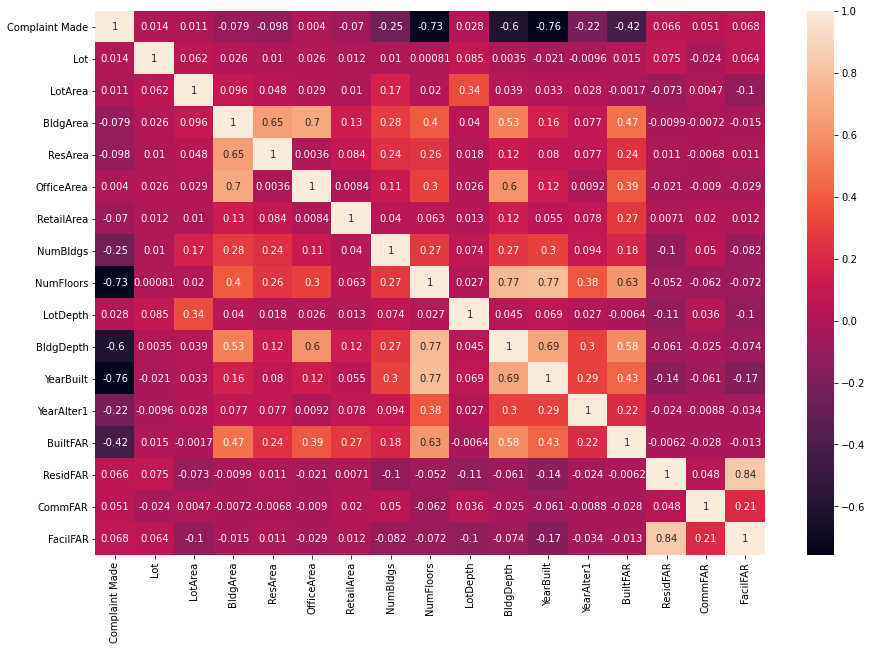

In [13]:
pearson_df = merged_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(pearson_df, annot=True)
plt.show()

### Conclusion of first approach

From the correlation dataframe, and the correlation matrix, we see that the feature with the highest correlation to a heating complaint being made is the **year that the building was built (pearson=-0.7553)**. The next highest is the number of floors the house has (pearson=-0.7313). The results of the P-value are inconclusive as there are all zero or extremely close to zero. From this, we may infer that this binary approach may not be the method for answering our questions.